# Importation des bibliotheques

In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Charger les données

In [520]:
data = pd.read_csv("exams.csv")


# Afficher les premières lignes du DataFrame

In [521]:
print("Données brutes:")
data.head()

Données brutes:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


# Select features for clustering


In [522]:
X = data.drop(columns=['gender'])

In [523]:
X

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,group A,high school,standard,completed,67,67,63
1,group D,some high school,free/reduced,none,40,59,55
2,group E,some college,free/reduced,none,59,60,50
3,group B,high school,standard,none,77,78,68
4,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...
995,group C,high school,standard,none,73,70,65
996,group D,associate's degree,free/reduced,completed,85,91,92
997,group C,some high school,free/reduced,none,32,35,41
998,group C,some college,standard,none,73,74,82


In [524]:
X = X.iloc[:, [4,5,6]]
X  = np.array(X)

In [525]:
X

array([[67, 67, 63],
       [40, 59, 55],
       [59, 60, 50],
       ...,
       [32, 35, 41],
       [73, 74, 82],
       [65, 60, 62]], dtype=int64)

# K-means

### Trouver le nombre optimal de clusters avec la méthode Elbow

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

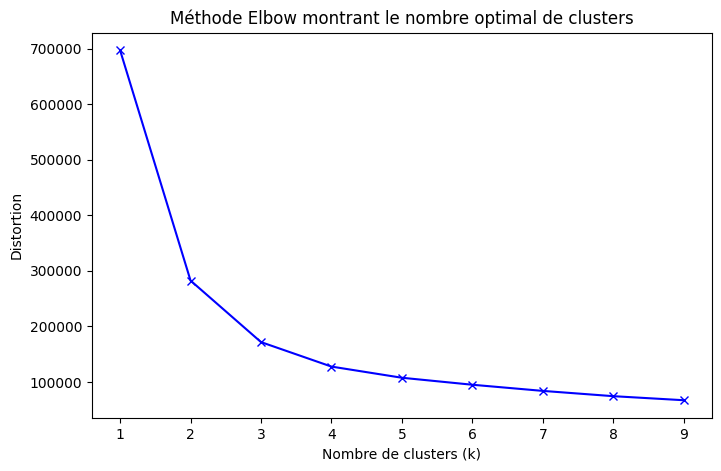

In [501]:
# Trouver le nombre optimal de clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Tracer le graphique de la méthode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distortion')
plt.title('Méthode Elbow montrant le nombre optimal de clusters')
plt.show()


### Entraîner le modèle K-means


In [461]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_predict = kmeans_model.fit_predict(X)

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Afficher les centres de clusters

In [462]:
print("Centres de clusters:")
print(kmeans_model.cluster_centers_)

Centres de clusters:
[[81.85585586 84.54954955 84.45345345]
 [64.56750572 67.43020595 65.88329519]
 [47.48695652 49.47826087 47.06086957]]


### Ajouter les étiquettes de clusters au DataFrame original


In [463]:
data['Cluster'] = kmeans_predict

In [464]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
0,male,group A,high school,standard,completed,67,67,63,1
1,female,group D,some high school,free/reduced,none,40,59,55,2
2,male,group E,some college,free/reduced,none,59,60,50,2
3,male,group B,high school,standard,none,77,78,68,1
4,male,group E,associate's degree,standard,completed,78,73,68,1
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,1
996,male,group D,associate's degree,free/reduced,completed,85,91,92,0
997,female,group C,some high school,free/reduced,none,32,35,41,2
998,female,group C,some college,standard,none,73,74,82,0


In [465]:
# Sélectionner les colonnes 4, 5 et 6
selected_columns = data.iloc[:, 5:8]

# Calculer les moyennes de chaque variable pour chaque cluster
cluster_means = data.groupby('Cluster')[selected_columns.columns].mean()

# Afficher les moyennes
print(cluster_means)


         math score  reading score  writing score
Cluster                                          
0         81.855856      84.549550      84.453453
1         64.550228      67.404110      65.865297
2         47.445415      49.449782      47.013100


In [466]:
# Définir une fonction pour mapper les clusters à la performance
def map_performance(cluster):
    if cluster == 0:
        return 'Elevée'
    elif cluster == 1:
        return 'Moyenne'
    elif cluster == 2:
        return 'Faible'
    else:
        return 'N/A'

# Ajouter la colonne de performance
data['Performance'] = data['Cluster'].apply(map_performance)



In [467]:
# Afficher le DataFrame avec la colonne de performance ajoutée
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster,Performance
0,male,group A,high school,standard,completed,67,67,63,1,Moyenne
1,female,group D,some high school,free/reduced,none,40,59,55,2,Faible
2,male,group E,some college,free/reduced,none,59,60,50,2,Faible
3,male,group B,high school,standard,none,77,78,68,1,Moyenne
4,male,group E,associate's degree,standard,completed,78,73,68,1,Moyenne
...,...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,1,Moyenne
996,male,group D,associate's degree,free/reduced,completed,85,91,92,0,Elevée
997,female,group C,some high school,free/reduced,none,32,35,41,2,Faible
998,female,group C,some college,standard,none,73,74,82,0,Elevée


### Calculer les métriques de clustering


In [468]:
silhouette_avg = silhouette_score(X, kmeans_predict)
calinski_harabasz = calinski_harabasz_score(X, kmeans_predict)
davies_bouldin = davies_bouldin_score(X, kmeans_predict)

In [469]:
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.42027242725332253
Calinski-Harabasz Index: 1525.3554623404543
Davies-Bouldin Index: 0.7695219534719774


### Visualiser les clusters en utilisant les deux premières dimensions


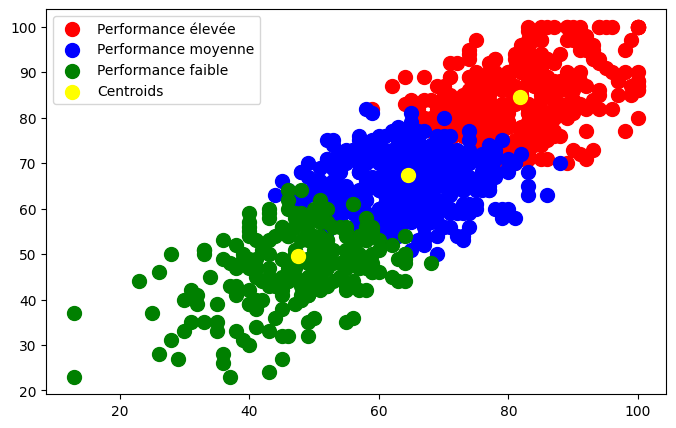

In [470]:
# Visualiser les clusters en utilisant les deux premières dimensions
plt.figure(figsize=(8, 5))
plt.scatter(X[kmeans_predict == 0, 0], X[kmeans_predict == 0, 2], s = 100, c = 'red', label = 'Performance élevée')
plt.scatter(X[kmeans_predict == 1, 0], X[kmeans_predict == 1, 2], s = 100, c = 'blue', label = 'Performance moyenne')
plt.scatter(X[kmeans_predict == 2, 0], X[kmeans_predict == 2, 2], s = 100, c = 'green', label = 'Performance faible')


#Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


# Clustering Hiérarchique

### Generate the linkage matrix


In [511]:
Z = linkage(X, method='ward')

### Plot the dendrogram


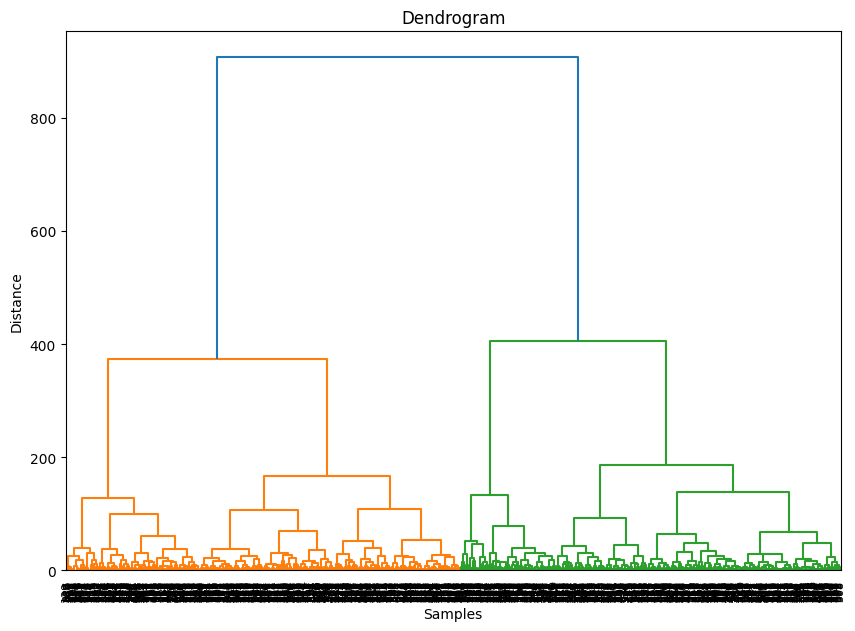

In [512]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()


### Appliquer le clustering hiérarchique


In [513]:
agg_model = AgglomerativeClustering(n_clusters=4)
agg_predict = agg_model.fit_predict(X)


### Ajouter cluster colonne

In [514]:
data['Cluster'] = agg_predict
data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
0,male,group A,high school,standard,completed,67,67,63,0
1,female,group D,some high school,free/reduced,none,40,59,55,0
2,male,group E,some college,free/reduced,none,59,60,50,0
3,male,group B,high school,standard,none,77,78,68,1
4,male,group E,associate's degree,standard,completed,78,73,68,1
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,1
996,male,group D,associate's degree,free/reduced,completed,85,91,92,3
997,female,group C,some high school,free/reduced,none,32,35,41,2
998,female,group C,some college,standard,none,73,74,82,1


In [515]:
# Sélectionner les colonnes 4, 5 et 6
selected_columns = data.iloc[:, 5:8]

# Calculer les moyennes de chaque variable pour chaque cluster
cluster_means = data.groupby('Cluster')[selected_columns.columns].mean()

# Afficher les moyennes
print(cluster_means)


         math score  reading score  writing score
Cluster                                          
0         58.226158      61.765668      60.267030
1         73.724036      75.347181      74.077151
2         42.642276      44.097561      41.813008
3         86.341040      89.699422      89.670520


### Calculer les métriques de clustering


In [516]:
silhouette_avg_hierarchical = silhouette_score(X, agg_predict)
calinski_harabasz_hierarchical = calinski_harabasz_score(X, agg_predict)
davies_bouldin_hierarchical = davies_bouldin_score(X, agg_predict)

print(f"Silhouette Score (Hierarchical): {silhouette_avg_hierarchical}")
print(f"Calinski-Harabasz Index (Hierarchical): {calinski_harabasz_hierarchical}")
print(f"Davies-Bouldin Index (Hierarchical): {davies_bouldin_hierarchical}")


Silhouette Score (Hierarchical): 0.3669198022395789
Calinski-Harabasz Index (Hierarchical): 1405.3936413899332
Davies-Bouldin Index (Hierarchical): 0.8202789747845861


### Visualiser les clusters hiérarchiques en utilisant les deux premières dimensions


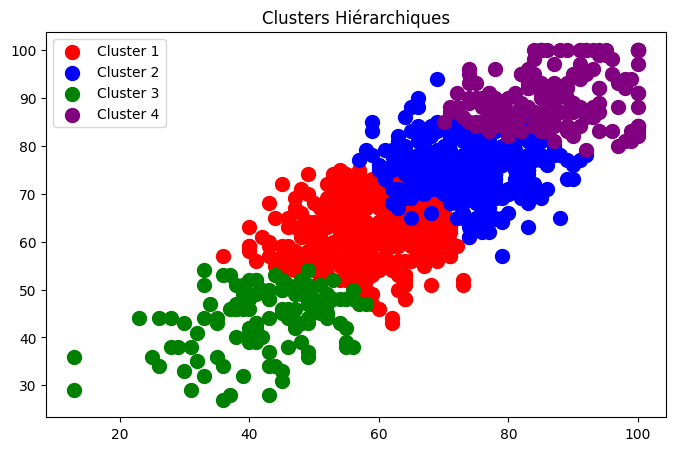

In [517]:
plt.figure(figsize=(8, 5))
plt.scatter(X[agg_predict == 0, 0], X[agg_predict == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[agg_predict == 1, 0], X[agg_predict == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[agg_predict == 2, 0], X[agg_predict == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[agg_predict == 3, 0], X[agg_predict == 3, 1], s=100, c='purple', label='Cluster 4')


plt.legend()
plt.title('Clusters Hiérarchiques')
plt.show()


# DBSCAN

### Appliquer DBSCAN


In [549]:
dbscan_model = DBSCAN(eps=4.5, min_samples=6)
dbscan_predict = dbscan_model.fit_predict(X)

### Ajouter les étiquettes de clusters au DataFrame original


In [550]:
data['Cluster'] = dbscan_predict

In [551]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
0,male,group A,high school,standard,completed,67,67,63,0
1,female,group D,some high school,free/reduced,none,40,59,55,0
2,male,group E,some college,free/reduced,none,59,60,50,0
3,male,group B,high school,standard,none,77,78,68,0
4,male,group E,associate's degree,standard,completed,78,73,68,0
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,0
996,male,group D,associate's degree,free/reduced,completed,85,91,92,0
997,female,group C,some high school,free/reduced,none,32,35,41,-1
998,female,group C,some college,standard,none,73,74,82,0


### Déterminer le nombre de clusters (exclure les points de bruit marqués par -1)


In [552]:
n_clusters = len(set(dbscan_predict)) - (1 if -1 in dbscan_predict else 0)
n_noise = list(dbscan_predict).count(-1)

print(f"Nombre de clusters formés par DBSCAN (excluant le bruit) : {n_clusters}")
print(f"Nombre de points de bruit : {n_noise}")

Nombre de clusters formés par DBSCAN (excluant le bruit) : 4
Nombre de points de bruit : 101


### Calculer les métriques de clustering


In [553]:
silhouette_avg_dbscan = silhouette_score(X, dbscan_predict)
calinski_harabasz_dbscan = calinski_harabasz_score(X, dbscan_predict)
davies_bouldin_dbscan = davies_bouldin_score(X, dbscan_predict)

print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")
print(f"Calinski-Harabasz Index (DBSCAN): {calinski_harabasz_dbscan}")
print(f"Davies-Bouldin Index (DBSCAN): {davies_bouldin_dbscan}")

Silhouette Score (DBSCAN): -0.04134727314788307
Calinski-Harabasz Index (DBSCAN): 32.32588487696491
Davies-Bouldin Index (DBSCAN): 1.5768836155489434


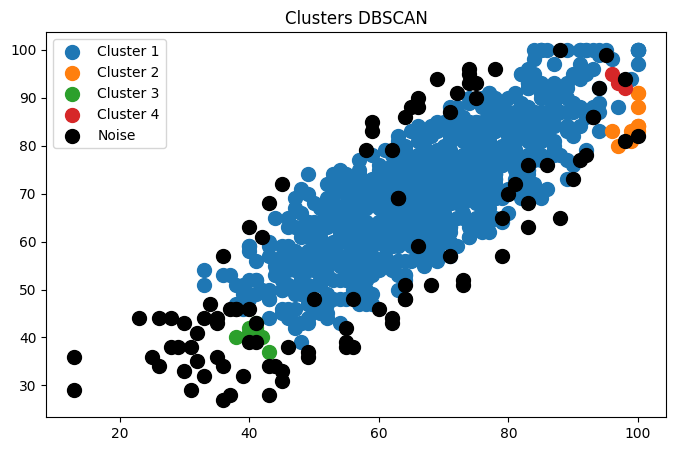

In [556]:
# Visualiser les clusters DBSCAN en utilisant les deux premières dimensions
plt.figure(figsize=(8, 5))
plt.scatter(X[dbscan_predict == 0, 0], X[dbscan_predict == 0, 1], s=100, label='Cluster 1')
plt.scatter(X[dbscan_predict == 1, 0], X[dbscan_predict == 1, 1], s=100, label='Cluster 2')
plt.scatter(X[dbscan_predict == 2, 0], X[dbscan_predict == 2, 1], s=100, label='Cluster 3')
plt.scatter(X[dbscan_predict == 3, 0], X[dbscan_predict == 3, 1], s=100, label='Cluster 4')
plt.scatter(X[dbscan_predict == -1, 0], X[dbscan_predict == -1, 1], s=100, c='black', label='Noise')

plt.legend()
plt.title('Clusters DBSCAN')
plt.show()

# Create a dictionary with all metrics


In [558]:

metrics = {
    'Algorithm': ['K-means', 'DBSCAN', 'Hierarchical'],
    'Silhouette Score': [silhouette_avg, silhouette_avg_dbscan, silhouette_avg_hierarchical],
    'Calinski-Harabasz Index': [calinski_harabasz, calinski_harabasz_dbscan, calinski_harabasz_hierarchical],
    'Davies-Bouldin Index': [davies_bouldin, davies_bouldin_dbscan, davies_bouldin_hierarchical]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a global table
print("Global Metrics Table for Clustering Algorithms:")
metrics_df

Global Metrics Table for Clustering Algorithms:


,Algorithm,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,K-means,0.420272,1525.355462,0.769522
1,DBSCAN,-0.041347,32.325885,1.576884
2,Hierarchical,0.366920,1405.393641,0.820279
